# STUDY CASE ASTRA CREDIT SCORE

## DWI SMARADAHANA INDRALOKA

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

## Upload Dataset

In [2]:
data = pd.read_csv("training.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


## Data Cleansing and Feature Engineering

### 1. Dropping the unused columns

In [4]:
data.drop(["ID"], axis = 1, inplace = True)

In [5]:
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### 2. Count the percentage of missing value for each field

In [6]:
round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)

TARGET       0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
LIMIT_BAL    0.0
dtype: float64

### 3. Make new columns for total bill amount and total pay ammount

In [7]:
data["TOTAL_BILL"] = data["BILL_AMT1"] + data["BILL_AMT2"] + data["BILL_AMT3"]
data["TOTAL_PAY"] = data["PAY_AMT1"] + data["PAY_AMT2"] + data["PAY_AMT3"]
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,TOTAL_BILL,TOTAL_PAY
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,72918.0,4587.0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0,50717.0,2800.0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,53879.0,4125.0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,8323.0,2086.0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,426824.0,36258.0


### 4. Drop data with zero total bill amount and total pay amount

In [8]:
data["TOTAL"] = data["TOTAL_BILL"] + data["TOTAL_PAY"]
data = data[data["TOTAL"] != 0]
data.drop(["TOTAL_BILL", "TOTAL_PAY", "TOTAL"], axis = 1, inplace = True)
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### 5. Drop data with limit ballance equal to zero

In [9]:
data = data[data["LIMIT_BAL"] != 0]

### 6. Make new columns for the percentage of bill amount based on limit ballance

In [10]:
data["TOTAL_TIME_PAY"] = data["PAY_1"] + data["PAY_2"] + data["PAY_3"]
data["BILL1_PER_LIMIT"] = data["BILL_AMT1"] / data["LIMIT_BAL"]
data["BILL2_PER_LIMIT"] = data["BILL_AMT2"] / data["LIMIT_BAL"]
data["BILL3_PER_LIMIT"] = data["BILL_AMT3"] / data["LIMIT_BAL"]
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,0,0.820233,0.814333,0.796033
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0,3,0.852000,0.823700,0.860150
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,0,0.866600,0.930000,0.897350
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,0,0.100150,0.147400,0.168600
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,0,1.008618,0.854094,0.648018


### 7. Getting the information from numerical data

In [11]:
numeric = ["LIMIT_BAL", "AGE","PAY_1", "PAY_2", "PAY_3", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "TOTAL_TIME_PAY", "BILL1_PER_LIMIT", "BILL2_PER_LIMIT", "BILL3_PER_LIMIT"]
numeric = data[numeric]
numeric.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,0.820233,0.814333,0.796033
1,20000.0,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,3,0.852000,0.823700,0.860150
2,20000.0,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,0.866600,0.930000,0.897350
3,20000.0,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,0.100150,0.147400,0.168600
4,170000.0,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,1.008618,0.854094,0.648018


In [12]:
numeric.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
count,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000,15948.000000
mean,157441.434663,43.357788,0.475608,0.448395,0.414159,52861.014108,50876.554866,48434.351894,5394.718021,5182.541384,5034.531038,1.338162,0.533154,0.516527,0.490337
std,125126.570722,8.743771,0.846592,0.895721,0.867011,74134.352183,71498.907687,68921.775659,15310.734263,15141.383624,15942.345887,2.272430,0.884152,0.864109,0.825646
min,10000.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000,-0.551933,-1.395540,-0.512550
25%,50000.000000,37.000000,0.000000,0.000000,0.000000,5000.000000,4425.000000,4056.750000,1000.000000,991.000000,478.750000,0.000000,0.036003,0.030814,0.028071
50%,120000.000000,42.000000,0.000000,0.000000,0.000000,24635.500000,23799.000000,21839.500000,2096.000000,2000.000000,1800.000000,0.000000,0.273900,0.264242,0.244924
75%,230000.000000,49.000000,1.000000,0.000000,0.000000,69159.500000,66354.000000,61643.750000,5000.000000,5000.000000,4290.250000,2.000000,0.807025,0.772070,0.721771
max,800000.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,12.000000,18.683800,19.057000,19.418900


### 8. Find the correlation from numerical variable with target variable

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


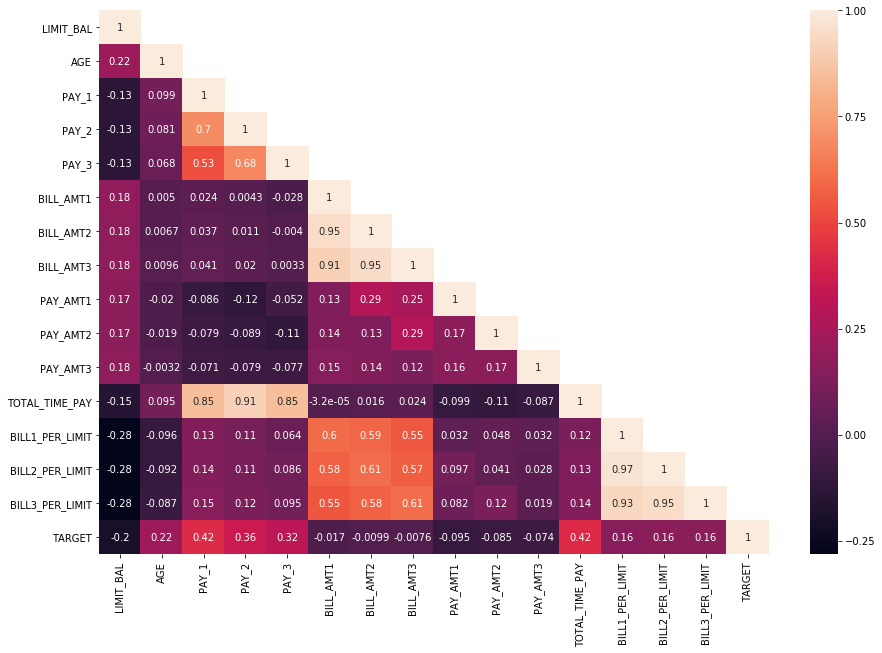

In [13]:
numeric["TARGET"] = data["TARGET"]
plt.figure(figsize=(15,10))
corr = numeric.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, annot = True)

### 9. Drop columns that have small correlation with target variable

In [14]:
data.drop(["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"], axis = 1, inplace = True)

In [15]:
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,TARGET,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,1,1,2,40,0,0,0,0,0,0.820233,0.814333,0.796033
1,20000.0,1,1,2,41,1,2,0,0,3,0.852000,0.823700,0.860150
2,20000.0,1,1,2,36,0,0,0,0,0,0.866600,0.930000,0.897350
3,20000.0,1,1,2,35,0,0,0,0,0,0.100150,0.147400,0.168600
4,170000.0,1,1,2,38,0,0,0,0,0,1.008618,0.854094,0.648018


### 10. Getting the information from categorical data

In [16]:
categoric = ["MARRIAGE", "EDUCATION", "SEX", "TARGET"]
categoric = data[categoric]
categoric.head()

,MARRIAGE,EDUCATION,SEX,TARGET
0,1,1,2,0
1,1,1,2,0
2,1,1,2,0
3,1,1,2,0
4,1,1,2,0


In [17]:
categoric.nunique()

MARRIAGE     3
EDUCATION    4
SEX          2
TARGET       2
dtype: int64

### 11. Find the correlation from categorical variable with target variable

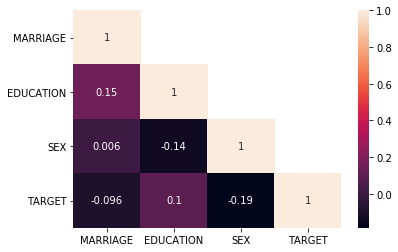

In [18]:
corr = categoric.corr(method = "spearman")
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, annot = True)

### 12. Drop columns that have small correlation with target variable

In [19]:
data.drop(["MARRIAGE", "EDUCATION"], axis = 1, inplace = True)

In [20]:
data.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,TARGET,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,2,40,0,0,0,0,0,0.820233,0.814333,0.796033
1,20000.0,2,41,1,2,0,0,3,0.852000,0.823700,0.860150
2,20000.0,2,36,0,0,0,0,0,0.866600,0.930000,0.897350
3,20000.0,2,35,0,0,0,0,0,0.100150,0.147400,0.168600
4,170000.0,2,38,0,0,0,0,0,1.008618,0.854094,0.648018


## Get Insight Using Visualization

### 1. Target vs Late Time of Payment

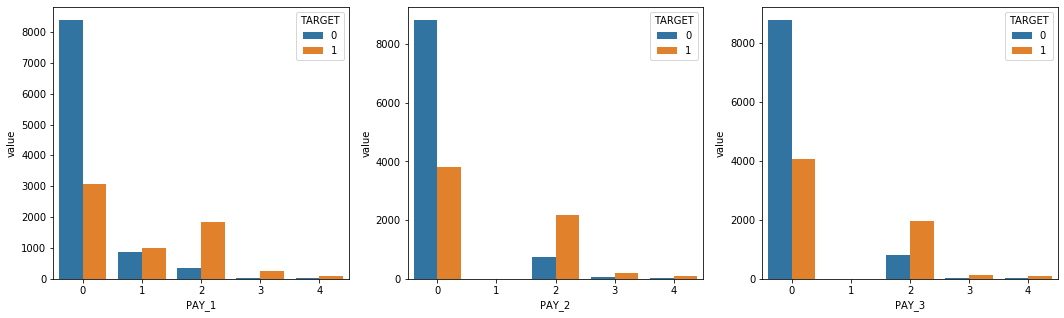

In [21]:
f = plt.figure(figsize = (18,5))

f.add_subplot(1, 3, 1)
ct = pd.crosstab(data.PAY_1, data.TARGET)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked.PAY_1, y = stacked.value, hue = stacked.TARGET)

f.add_subplot(1, 3, 2)
ct = pd.crosstab(data.PAY_2, data.TARGET)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked.PAY_2, y = stacked.value, hue = stacked.TARGET)

f.add_subplot(1, 3, 3)
ct = pd.crosstab(data.PAY_3, data.TARGET)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked.PAY_3, y = stacked.value, hue = stacked.TARGET)

***
Based on the graph above, we can see that if there is a late payment within one of the payment periods, it is likely to be late to pay the following month.
***

### 2. Target vs Total Late Payment

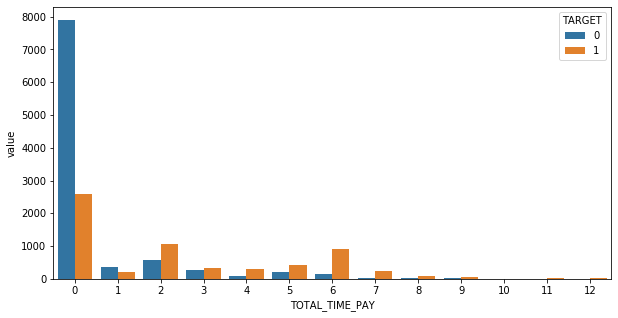

In [22]:
f = plt.figure(figsize = (10,5))
ct = pd.crosstab(data.TOTAL_TIME_PAY, data.TARGET)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked.TOTAL_TIME_PAY, y = stacked.value, hue = stacked.TARGET)

***
Based on the graph above, we can see that if there is a total payment delay of more than one month, it is likely to be late paying the following month. We can also see that even if there is no delay at all, there will still be a possibility of being late to pay the following month, this could be due to the value of the bill above the ballance limit or because of other things.
***

### 3. Target vs Age

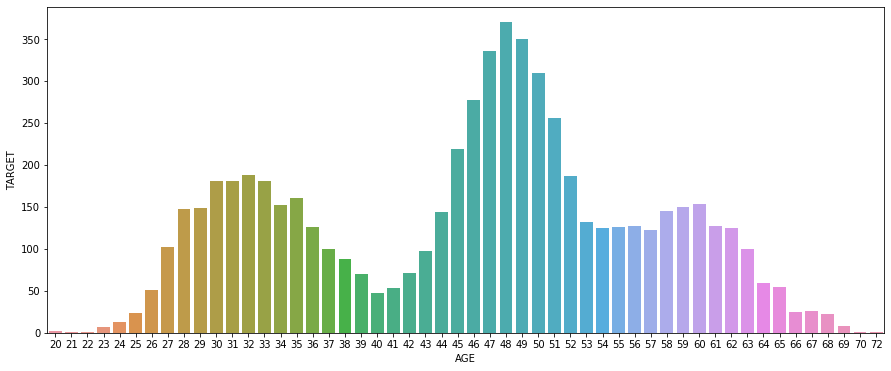

In [23]:
age = data[["AGE", "TARGET"]].groupby("AGE").sum()["TARGET"].sort_values(ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(x = age.index, y = age)

***
Based on the graph above, we can see that the age range that most late payments make in April is the age of 45 to 52
***

### 4. Target vs Limit Ballance

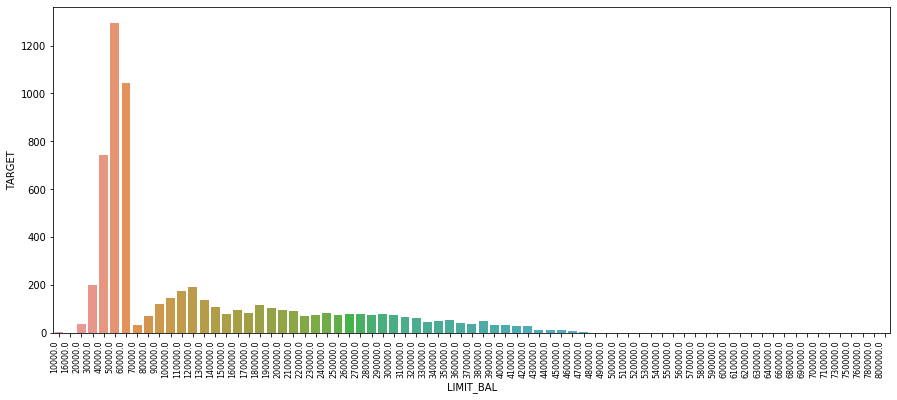

In [24]:
bal = data[["LIMIT_BAL", "TARGET"]].groupby("LIMIT_BAL").sum()["TARGET"].sort_values(ascending = False)
plt.figure(figsize = (15,6))
plt.xticks(rotation = 90, ha = "right", fontsize = 8)
sns.barplot(x = bal.index, y = bal)

***
Based on the graph above, we can see that the most total late paying in April is the accounts with a limit ballance of 40000, 50000 and 60000.
***

## Make Target Variable and Predictor Variable

In [25]:
y = data["TARGET"]
x = data.drop("TARGET", axis = 1)
x.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,2,40,0,0,0,0,0.820233,0.814333,0.796033
1,20000.0,2,41,1,2,0,3,0.852000,0.823700,0.860150
2,20000.0,2,36,0,0,0,0,0.866600,0.930000,0.897350
3,20000.0,2,35,0,0,0,0,0.100150,0.147400,0.168600
4,170000.0,2,38,0,0,0,0,1.008618,0.854094,0.648018


## Separate Data Training and Data Testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

## Classification

### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty = "l1")
logreg.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logreg.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1698,  237],
       [ 541,  714]], dtype=int64)

accuracy:  0.7561128526645768
precision:  0.750788643533123
recall:  0.5689243027888446
auc:  0.7232218413169029


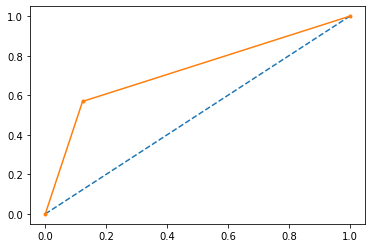

In [30]:
from sklearn.metrics import roc_curve
a1 = metrics.accuracy_score(y_test, y_pred)
p1 = metrics.precision_score(y_test, y_pred)
r1 = metrics.recall_score(y_test, y_pred)
auc1 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a1)
print("precision: ", p1)
print("recall: ", r1)
print("auc: ", auc1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 2. Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1810,  125],
       [ 810,  445]], dtype=int64)

accuracy:  0.7068965517241379
precision:  0.7807017543859649
recall:  0.3545816733067729
auc:  0.6449910950513194


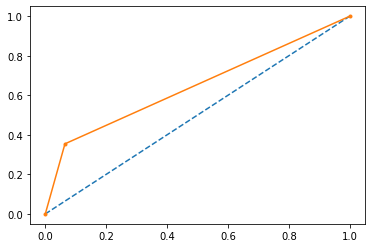

In [33]:
from sklearn.metrics import roc_curve
a2 = metrics.accuracy_score(y_test, y_pred)
p2 = metrics.precision_score(y_test, y_pred)
r2 = metrics.recall_score(y_test, y_pred)
auc2 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a2)
print("precision: ", p2)
print("recall: ", r2)
print("auc: ", auc2)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 3. K-Nearest Neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1717,  218],
       [ 261,  994]], dtype=int64)

accuracy:  0.8498432601880878
precision:  0.8201320132013201
recall:  0.7920318725099602
auc:  0.8396851869009749


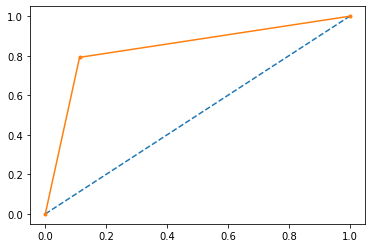

In [36]:
from sklearn.metrics import roc_curve
a3 = metrics.accuracy_score(y_test, y_pred)
p3 = metrics.precision_score(y_test, y_pred)
r3 = metrics.recall_score(y_test, y_pred)
auc3 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a3)
print("precision: ", p3)
print("recall: ", r3)
print("auc: ", auc3)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 4. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1772,  163],
       [ 208, 1047]], dtype=int64)

accuracy:  0.8836990595611285
precision:  0.8652892561983471
recall:  0.8342629482071713
auc:  0.87501261105449


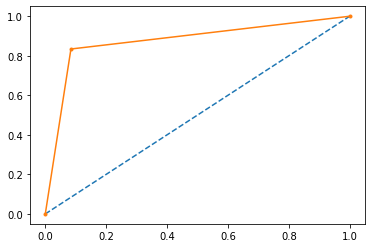

In [39]:
from sklearn.metrics import roc_curve
a4 = metrics.accuracy_score(y_test, y_pred)
p4 = metrics.precision_score(y_test, y_pred)
r4 = metrics.recall_score(y_test, y_pred)
auc4 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a4)
print("precision: ", p4)
print("recall: ", r4)
print("auc: ", auc4)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 5. Decision Tree

In [40]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1686,  249],
       [ 246, 1009]], dtype=int64)

accuracy:  0.8448275862068966
precision:  0.8020667726550079
recall:  0.80398406374502
auc:  0.8376509466011922


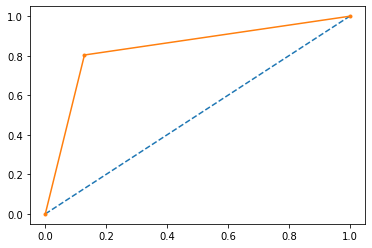

In [42]:
from sklearn.metrics import roc_curve
a5 = metrics.accuracy_score(y_test, y_pred)
p5 = metrics.precision_score(y_test, y_pred)
r5 = metrics.recall_score(y_test, y_pred)
auc5 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a5)
print("precision: ", p5)
print("recall: ", r5)
print("auc: ", auc5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 6. Support Vector Machine

In [43]:
from sklearn import svm
svc = svm.SVC(gamma = "auto")
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1754,  181],
       [ 248, 1007]], dtype=int64)

accuracy:  0.8655172413793103
precision:  0.8476430976430976
recall:  0.802390438247012
auc:  0.8544251932837127


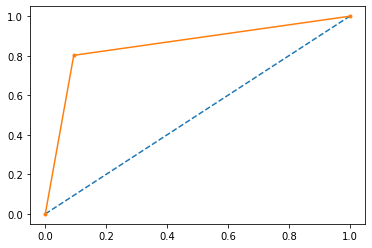

In [45]:
from sklearn.metrics import roc_curve
a6 = metrics.accuracy_score(y_test, y_pred)
p6 = metrics.precision_score(y_test, y_pred)
r6 = metrics.recall_score(y_test, y_pred)
auc6 = metrics.roc_auc_score(y_test, y_pred)
print("accuracy: ", a6)
print("precision: ", p6)
print("recall: ", r6)
print("auc: ", auc6)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Summary of the Classification Algorithm

In [46]:
summary = {"Log Reg":[a1, p1, r1, auc1], "Naive Bayes":[a2, p2, r2, auc2], "KNN":[a3, p3, r3, auc3], "Random Forest":[a4, p4, r4, auc4], "Decision Tree":[a5, p5, r5, auc5], "SVM":[a6, p6, r6, auc6]} 
df = pd.DataFrame(summary, index =["Accuracy", "Precision", "Recall", "AUC"])
df

,Log Reg,Naive Bayes,KNN,Random Forest,Decision Tree,SVM
Accuracy,0.756113,0.706897,0.849843,0.883699,0.844828,0.865517
Precision,0.750789,0.780702,0.820132,0.865289,0.802067,0.847643
Recall,0.568924,0.354582,0.792032,0.834263,0.803984,0.802390
AUC,0.723222,0.644991,0.839685,0.875013,0.837651,0.854425


***
Based on the summary above, it was found that the most appropriate algorithm to be applied to this dataset is the Random Forest algorithm, which has the highest accuracy, precision, recall and auc values compared to other algorithms.
***

## Apply Random Forest Algorithm to the Data Testing

## Upload Dataset

In [47]:
data1 = pd.read_csv("testing.csv", delimiter = ";")
data2 = pd.read_csv("testing.csv", delimiter = ";")
data1.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


## Do Feature Engineering Like Data Training

In [48]:
data1 = data1[data1["LIMIT_BAL"] != 0]
data2 = data2[data2["LIMIT_BAL"] != 0]
data1["TOTAL_TIME_PAY"] = data1["PAY_1"] + data1["PAY_2"] + data1["PAY_3"]
data1["BILL1_PER_LIMIT"] = data1["BILL_AMT1"] / data1["LIMIT_BAL"]
data1["BILL2_PER_LIMIT"] = data1["BILL_AMT2"] / data1["LIMIT_BAL"]
data1["BILL3_PER_LIMIT"] = data1["BILL_AMT3"] / data1["LIMIT_BAL"]
data1.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0,0.814333,0.796033,0.807800
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,2,0.823700,0.860150,0.920550
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0,0.930000,0.897350,0.937900
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0,0.147400,0.168600,0.000000
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0,0.854094,0.648018,0.659747


In [49]:
data1.drop(["ID", "MARRIAGE", "EDUCATION", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"], axis = 1, inplace = True)
data1.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,TOTAL_TIME_PAY,BILL1_PER_LIMIT,BILL2_PER_LIMIT,BILL3_PER_LIMIT
0,30000.0,2,40,0,0,0,0,0.814333,0.796033,0.807800
1,20000.0,2,41,2,0,0,2,0.823700,0.860150,0.920550
2,20000.0,2,36,0,0,0,0,0.930000,0.897350,0.937900
3,20000.0,2,35,0,0,0,0,0.147400,0.168600,0.000000
4,170000.0,2,38,0,0,0,0,0.854094,0.648018,0.659747


## Random Forest Algorithm for Data Testing

In [50]:
from sklearn.ensemble import RandomForestClassifier
x_test = data1
x_train = x
y_train = y
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(y_pred)

[0 0 0 ... 1 1 1]


## Input Target Column Values to the Initial Data Testing

In [51]:
data2["TARGET"] = y_pred
data2.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


## Make CSV Files for Data Testing with Target Values

In [52]:
data2.to_csv(r'Hasil Testing.csv', index = False)

***
# THANK YOU
***